In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#full_zips_df = pd.read_csv("full_zip_codes.csv", index_col="ZIPCODE")
#short_zips_list_df = pd.read_csv("Preliminary_zip_route_weight.csv", index_col="Zipcode")
joined_zips_grb_df = pd.read_csv("zips_load_demographics.csv")

In [3]:
joined_zips_grb_df.head()

,ZIP,load_weight,TOTAL_POPULATION,TOTAL_HOUSEHOLDS,MEDIAN_HOUSEHOLD_INCOME,MEAN_HOUSEHOLD_INCOME,TOTAL_HOUSING_UNITS
0,78617,1325600.0,27900.0,6520.0,52819.0,69936.0,7244.0
1,78652,908280.0,NaN,NaN,NaN,NaN,NaN
2,78653,825420.0,20822.0,6332.0,66752.0,75678.0,6891.0
3,78701,458460.0,7875.0,4855.0,112201.0,173289.0,6576.0
4,78702,3741320.0,22876.0,8937.0,54053.0,73919.0,9839.0


In [5]:
joined_zips_grb_df = joined_zips_grb_df.dropna()
joined_zips_grb_df.head()


,ZIP,load_weight,TOTAL_POPULATION,TOTAL_HOUSEHOLDS,MEDIAN_HOUSEHOLD_INCOME,MEAN_HOUSEHOLD_INCOME,TOTAL_HOUSING_UNITS
0,78617,1325600.0,27900.0,6520.0,52819.0,69936.0,7244.0
2,78653,825420.0,20822.0,6332.0,66752.0,75678.0,6891.0
3,78701,458460.0,7875.0,4855.0,112201.0,173289.0,6576.0
4,78702,3741320.0,22876.0,8937.0,54053.0,73919.0,9839.0
5,78703,3671428.0,20788.0,9723.0,98553.0,166396.0,11047.0


In [8]:
joined_zips_grb_df["POPULATION_PER_UNIT"] = joined_zips_grb_df.TOTAL_POPULATION/joined_zips_grb_df.TOTAL_HOUSING_UNITS
joined_zips_grb_df.head()

,ZIP,load_weight,TOTAL_POPULATION,TOTAL_HOUSEHOLDS,MEDIAN_HOUSEHOLD_INCOME,MEAN_HOUSEHOLD_INCOME,TOTAL_HOUSING_UNITS,POPULATION_PER_UNIT,LOAD_PER_CAPITA
0,78617,1325600.0,27900.0,6520.0,52819.0,69936.0,7244.0,3.851463,47.512545
2,78653,825420.0,20822.0,6332.0,66752.0,75678.0,6891.0,3.021622,39.641725
3,78701,458460.0,7875.0,4855.0,112201.0,173289.0,6576.0,1.197536,58.217143
4,78702,3741320.0,22876.0,8937.0,54053.0,73919.0,9839.0,2.325033,163.547823
5,78703,3671428.0,20788.0,9723.0,98553.0,166396.0,11047.0,1.881778,176.612854


In [9]:
joined_zips_grb_df["LOAD_PER_CAPITA"] = joined_zips_grb_df.load_weight/joined_zips_grb_df.TOTAL_POPULATION
joined_zips_grb_df.head()

,ZIP,load_weight,TOTAL_POPULATION,TOTAL_HOUSEHOLDS,MEDIAN_HOUSEHOLD_INCOME,MEAN_HOUSEHOLD_INCOME,TOTAL_HOUSING_UNITS,POPULATION_PER_UNIT,LOAD_PER_CAPITA
0,78617,1325600.0,27900.0,6520.0,52819.0,69936.0,7244.0,3.851463,47.512545
2,78653,825420.0,20822.0,6332.0,66752.0,75678.0,6891.0,3.021622,39.641725
3,78701,458460.0,7875.0,4855.0,112201.0,173289.0,6576.0,1.197536,58.217143
4,78702,3741320.0,22876.0,8937.0,54053.0,73919.0,9839.0,2.325033,163.547823
5,78703,3671428.0,20788.0,9723.0,98553.0,166396.0,11047.0,1.881778,176.612854


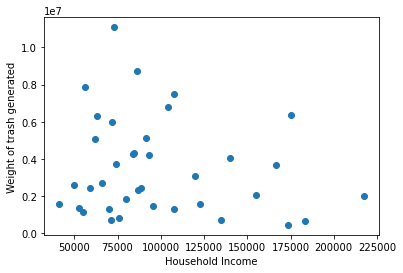

In [10]:
plt.scatter(joined_zips_grb_df.MEAN_HOUSEHOLD_INCOME, joined_zips_grb_df.load_weight)
plt.xlabel('Household Income')
plt.ylabel('Weight of trash generated')
plt.show()

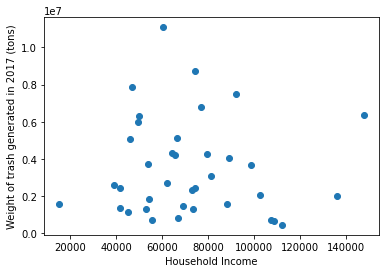

In [16]:
plt.scatter(joined_zips_grb_df.MEDIAN_HOUSEHOLD_INCOME, joined_zips_grb_df.load_weight)
plt.xlabel('Household Income')
plt.ylabel('Weight of trash generated in 2017 (tons)')
plt.show()

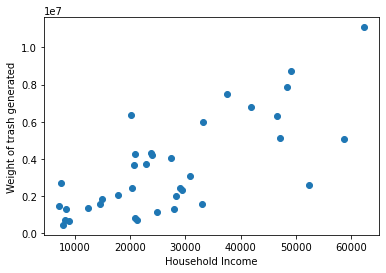

In [12]:
plt.scatter(joined_zips_grb_df.TOTAL_POPULATION, joined_zips_grb_df.load_weight)
plt.xlabel('Household Income')
plt.ylabel('Weight of trash generated')
plt.show()

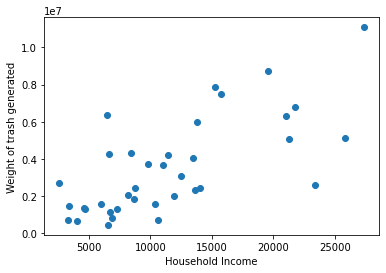

In [10]:
plt.scatter(joined_zips_grb_df.TOTAL_HOUSING_UNITS, joined_zips_grb_df.load_weight)
plt.xlabel('Household Income')
plt.ylabel('Weight of trash generated')
plt.show()

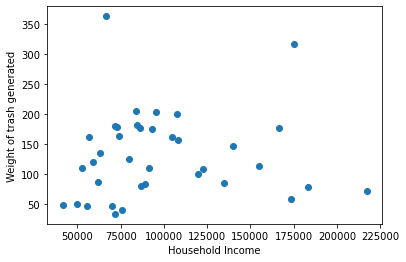

In [14]:
plt.scatter(joined_zips_grb_df.MEAN_HOUSEHOLD_INCOME, joined_zips_grb_df.LOAD_PER_CAPITA)
plt.xlabel('Household Income')
plt.ylabel('Weight of trash generated')
plt.show()

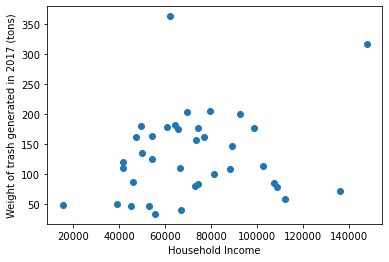

In [18]:
plt.scatter(joined_zips_grb_df.MEDIAN_HOUSEHOLD_INCOME, joined_zips_grb_df.LOAD_PER_CAPITA)
plt.xlabel('Household Income')
plt.ylabel('Weight of trash generated in 2017 (tons)')
plt.show()

In [8]:
X = joined_zips_grb_df.TOTAL_POPULATION.values.reshape(-1, 1)

In [12]:
X.shape

(37, 1)

In [12]:
y = merged_zips.Weight

In [13]:
model = LinearRegression()

In [14]:
model.fit(X,y)

LinearRegression()

In [15]:
y_pred = model.predict(X)
print(y_pred.shape)

(25,)


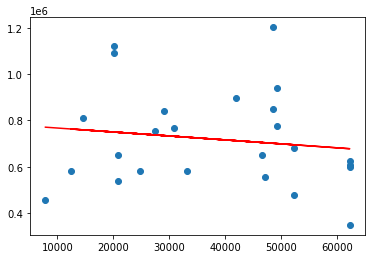

In [32]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()